In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dl_file=tfds.download.DownloadManager(download_dir='/content/sample_data')

In [ ]:
plant=dl_file.download_and_extract('https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip')

In [ ]:
!unzip /content/sample_data/extracted/ZIP.md-data-cach-zipf-prod.s3.eu-west-1_tywb-1OAX1Gq-RqqeVcEQluIZ-WScw5j9Get4HuYeJesqkdrg.zip/Plant_leaf_diseases_dataset_with_augmentation.zip 

Streaming output truncated to the last 5000 lines.
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (132).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1320).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1321).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1322).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1323).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1324).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1325).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1326).JPG  
  infl

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
mkdir tomato_data

In [ ]:
mv Plant_leave_diseases_dataset_with_augmentation/Tomato* tomato_data

In [ ]:
tomato_data= '/content/tomato_data'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  tomato_data,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 18835 files belonging to 10 classes.
Using 13185 files for training.


In [ ]:
val_da=tf.keras.preprocessing.image_dataset_from_directory(
    tomato_data,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 18835 files belonging to 10 classes.
Using 5650 files for validation.


In [ ]:
class_names=train_ds.class_names

In [ ]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_da=val_da.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normal_layer=layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
num_classes = 10

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_da,
  epochs=epochs
)

Epoch 1/10
413/413 [==============================] - 13s 32ms/step - loss: 2.2163 - accuracy: 0.2841 - val_loss: 2.1457 - val_accuracy: 0.2851
Epoch 2/10
413/413 [==============================] - 7s 17ms/step - loss: 2.1510 - accuracy: 0.2841 - val_loss: 2.1501 - val_accuracy: 0.2851
Epoch 3/10
413/413 [==============================] - 7s 17ms/step - loss: 2.1510 - accuracy: 0.2841 - val_loss: 2.1495 - val_accuracy: 0.2851
Epoch 4/10
413/413 [==============================] - 7s 17ms/step - loss: 2.1511 - accuracy: 0.2841 - val_loss: 2.1450 - val_accuracy: 0.2851
Epoch 5/10
413/413 [==============================] - 7s 17ms/step - loss: 2.1512 - accuracy: 0.2841 - val_loss: 2.1477 - val_accuracy: 0.2851
Epoch 6/10
413/413 [==============================] - 7s 17ms/step - loss: 2.1512 - accuracy: 0.2841 - val_loss: 2.1441 - val_accuracy: 0.2851
Epoch 7/10
413/413 [==============================] - 7s 17ms/step - loss: 2.1513 - accuracy: 0.2841 - val_loss: 2.1487 - val_accuracy: 0.285

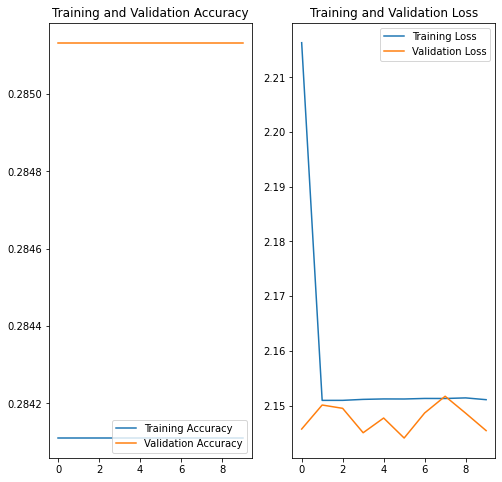

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)


In [ ]:

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_da,
  epochs=epochs
)

Epoch 1/100
413/413 [==============================] - 9s 21ms/step - loss: 2.4504 - accuracy: 0.2761 - val_loss: 2.1475 - val_accuracy: 0.2851
Epoch 2/100
413/413 [==============================] - 8s 20ms/step - loss: 2.1386 - accuracy: 0.2841 - val_loss: 2.1211 - val_accuracy: 0.2851
Epoch 3/100
413/413 [==============================] - 8s 20ms/step - loss: 2.0075 - accuracy: 0.3008 - val_loss: 1.7911 - val_accuracy: 0.3538
Epoch 4/100
413/413 [==============================] - 8s 20ms/step - loss: 1.7266 - accuracy: 0.3917 - val_loss: 1.5826 - val_accuracy: 0.4719
Epoch 5/100
413/413 [==============================] - 8s 20ms/step - loss: 1.6159 - accuracy: 0.4435 - val_loss: 1.4900 - val_accuracy: 0.4966
Epoch 6/100
413/413 [==============================] - 8s 20ms/step - loss: 1.5436 - accuracy: 0.4680 - val_loss: 1.5169 - val_accuracy: 0.4830
Epoch 7/100
413/413 [==============================] - 8s 20ms/step - loss: 1.4963 - accuracy: 0.4884 - val_loss: 1.4721 - val_accuracy:

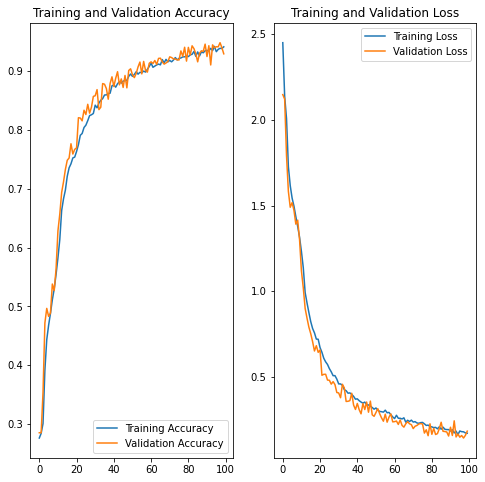

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np

tomato_url = "https://tse2.mm.bing.net/th?id=OIP._n5DZGBBWuDCiaLO_s_jggHaJ4&pid=Api&P=0&w=300&h=300"
tomato_path = tf.keras.utils.get_file('tomato3', origin=tomato_url)

img = keras.preprocessing.image.load_img(
    tomato_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

16384/12299 [=======================================] - 0s 0us/step
This image most likely belongs to Tomato___Late_blight with a 100.00 percent confidence.
